# Business understanding
Goal is to segment customers based on their income and spending habits. This will help the marketing team to target the right customers with the right products.


## Data Understanding

## Data Preparation

In [700]:
import pandas  as pd
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2025 - df["Year_Birth"]
df.drop(['ID'] , axis=1, inplace=True)
df = df.dropna()

df = df[~df["Marital_Status"].isin(["Absurd", "YOLO"])]
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [701]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = df[df.Income > Q3 + 1.5*IQR]
df = df[df.Income < Q3 + 1.5*IQR]
Income_outliers.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,0,0,0,0,0,3,11,0,1608,52
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,0,0,0,0,3,11,0,107,49
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,3,11,0,6,50
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,0,0,0,0,0,3,11,0,1717,43
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,0,0,0,0,3,11,0,59,54
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,0,0,0,0,0,3,11,0,1730,48
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,3,11,0,8,76
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,0,0,0,0,0,3,11,0,62,48


In [702]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1

Age_outliers = df[df.Age > Q3 + 1.5*IQR]
df = df[df.Age < Q3 + 1.5*IQR]
Age_outliers.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,0,0,0,0,1,3,11,0,65,125
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,0,0,0,0,3,11,0,22,132
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,0,1,0,0,0,3,11,0,1853,126


C:\Users\tursk\AppData\Local\Temp\ipykernel_25356\320704856.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


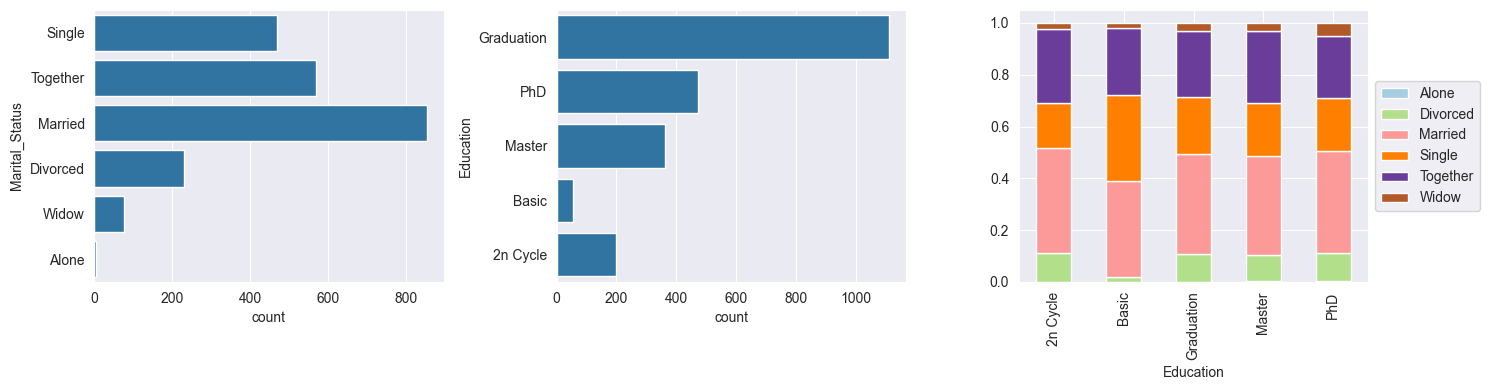

In [703]:
import seaborn as sns
import matplotlib.pyplot as plt
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(df['Marital_Status'], ax=ax[0])
sns.countplot(df['Education'], ax=ax[1])
df_plot = df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0,)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

In [704]:
features = ["Income"]
features_spent = ["TotalSpent"]
X_continuous = df[features]

## Data Modeling

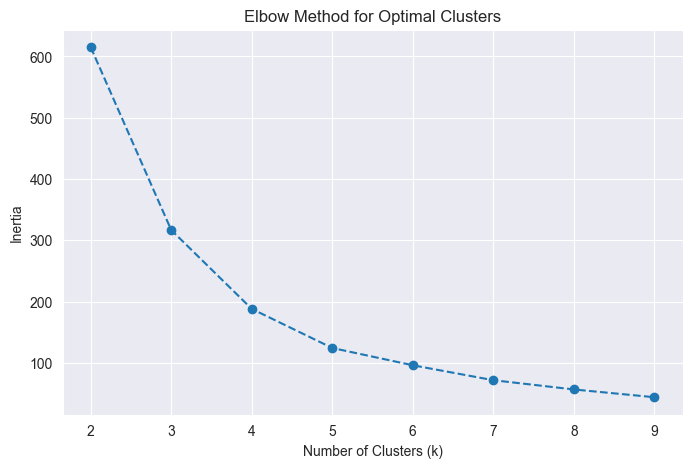

In [705]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_continuous)
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_continuous_scaled, columns=features)



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
    
    

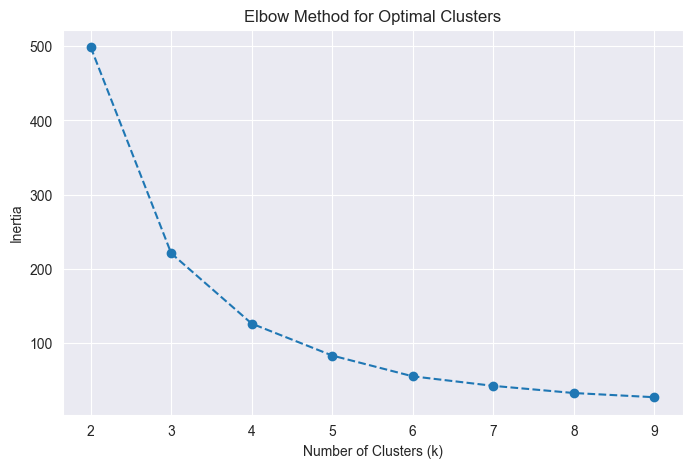

In [706]:
X_spent = df[features_spent]
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_spent)
# Convert back to DataFrame
X_scaled_spent = pd.DataFrame(X_continuous_scaled, columns=features_spent)



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled_spent)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [707]:
model = KMeans(init='random', n_clusters=4, random_state=42).fit(X_scaled)
model_spent = KMeans(init='random', n_clusters=4, random_state=42).fit(X_scaled_spent)
X_scaled['Cluster'] = model.labels_
X_scaled['Cluster'].value_counts()


Cluster
0    648
2    616
1    488
3    449
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

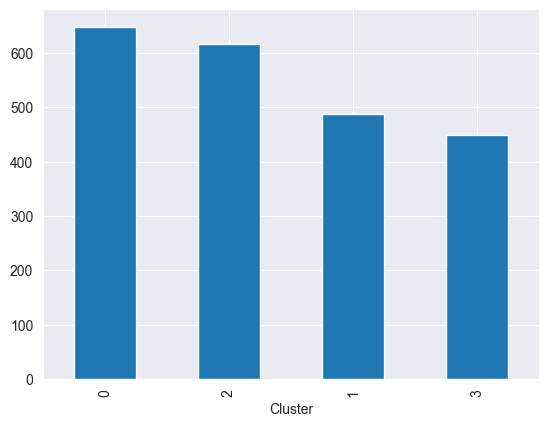

In [708]:
X_scaled['Cluster'].value_counts().plot(kind='bar')

In [709]:

X_scaled.groupby('Cluster').mean()

,Income
Cluster,
0,-0.489690
1,1.348642
2,0.447650
3,-1.373209


In [710]:
from sklearn.metrics import silhouette_score
# Compute Silhouette Score
silhouette = silhouette_score(X_scaled, model.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette:.2f}")

Silhouette Score for 3 clusters: 0.80


In [711]:
silhouette_score = silhouette_score(X_scaled_spent, model_spent.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette_score:.2f}")

Silhouette Score for 3 clusters: 0.65


In [712]:
df["Cluster"] = model.fit_predict(X_scaled)
df["SpendingCluster"] = model_spent.fit_predict(X_scaled_spent)
#mean of all clusters
df.groupby("Cluster")["Income"].mean()


Cluster
0    60879.873377
1    79545.260246
2    41461.495370
3    23158.097996
Name: Income, dtype: float64

In [713]:
df.groupby("SpendingCluster")["TotalSpent"].mean()

SpendingCluster
0    1122.274123
1     576.370283
2    1768.423221
3     101.045541
Name: TotalSpent, dtype: float64

## Results Evaluation

In [714]:


df.loc[df["Cluster"] == 2, "Segment"] = "Poor"
df.loc[df["Cluster"] == 3, "Segment"] = "Medium Income"
df.loc[df["Cluster"] == 0, "Segment"] = "High Income"
df.loc[df["Cluster"] == 1, "Segment"] = "Rich"

df.loc[df["SpendingCluster"] == 2, "SpendingHabits"] = "Low Spender"
df.loc[df["SpendingCluster"] == 1, "SpendingHabits"] = "Medium Spender"
df.loc[df["SpendingCluster"] == 3, "SpendingHabits"] = "High Spender"
df.loc[df["SpendingCluster"] == 0, "SpendingHabits"] = "Very High Spender"


In [715]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster,Segment,SpendingHabits
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,3,11,1,1617,68,0,2,High Income,Low Spender
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,3,11,0,27,71,2,3,Poor,High Spender
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,3,11,0,776,60,1,1,Rich,Medium Spender
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,3,11,0,53,41,3,3,Medium Income,High Spender
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,3,11,0,422,44,0,1,High Income,Medium Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,3,11,0,1341,58,0,0,High Income,Very High Spender
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,3,11,0,444,79,0,1,High Income,Medium Spender
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,3,11,0,1241,44,0,0,High Income,Very High Spender
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,3,11,0,843,69,0,1,High Income,Medium Spender


In [716]:
df_poor = df[df["Segment"] == "Poor"]
df_rich = df[df["Segment"] == "Rich"]
df_high_income = df[df["Segment"] == "High Income"]
df_medium_income = df[df["Segment"] == "Medium Income"]

In [717]:
features_to_plot = ["MntWines","TotalSpent" ,"MntGoldProds"]
df_high_income.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,...,616.000000,616.000000,616.000000,616.0,616.0,616.000000,616.000000,616.000000,616.0,616.000000
mean,1965.918831,60879.873377,0.225649,0.777597,48.639610,450.725649,31.922078,175.613636,43.024351,30.323052,...,0.032468,0.017857,0.008117,3.0,11.0,0.103896,791.034091,59.081169,0.0,1.060065
std,10.831446,5454.254499,0.451978,0.494738,28.095192,291.085383,40.795430,160.509524,53.486548,37.583700,...,0.177382,0.132540,0.089800,0.0,0.0,0.305374,433.600367,10.831446,0.0,1.065938
min,1943.000000,51195.000000,0.000000,0.000000,0.000000,5.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000,33.000000,0.0,0.000000
25%,1957.000000,56129.000000,0.000000,0.000000,25.000000,224.000000,4.000000,64.750000,6.000000,4.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,454.750000,51.000000,0.0,0.000000
50%,1966.000000,61216.000000,0.000000,1.000000,50.000000,398.000000,16.000000,128.000000,20.000000,14.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,784.000000,59.000000,0.0,1.000000
75%,1974.000000,65487.250000,0.000000,1.000000,72.000000,623.500000,44.250000,237.250000,63.000000,44.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1071.250000,68.000000,0.0,2.000000
max,1992.000000,70179.000000,2.000000,2.000000,99.000000,1459.000000,199.000000,849.000000,259.000000,192.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2440.000000,82.000000,0.0,3.000000


In [718]:
df_rich.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,488.000000,488.000000,488.00000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,488.000000,488.000000,488.0,488.0,488.000000,488.000000,488.000000,488.0,488.000000
mean,1967.680328,79545.260246,0.07582,0.264344,49.754098,650.155738,63.008197,445.096311,90.643443,68.032787,...,0.239754,0.030738,0.004098,3.0,11.0,0.288934,1390.547131,57.319672,1.0,1.008197
std,12.852674,6867.388066,0.27262,0.472877,29.366637,329.280979,49.095389,234.701858,65.848778,53.209621,...,0.427371,0.172783,0.063953,0.0,0.0,0.453733,440.233476,12.852674,0.0,0.952644
min,1941.000000,70287.000000,0.00000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,277.000000,30.000000,1.0,0.000000
25%,1957.000000,74241.000000,0.00000,0.000000,25.000000,393.750000,24.000000,258.500000,38.000000,26.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1078.750000,48.000000,1.0,0.000000
50%,1968.000000,78574.000000,0.00000,0.000000,52.000000,604.000000,48.000000,415.000000,75.000000,53.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1378.500000,57.000000,1.0,1.000000
75%,1977.000000,83146.500000,0.00000,0.250000,74.250000,899.500000,96.250000,602.500000,137.000000,103.000000,...,0.000000,0.000000,0.000000,3.0,11.0,1.000000,1690.250000,68.000000,1.0,2.000000
max,1995.000000,113734.000000,2.00000,2.000000,99.000000,1493.000000,197.000000,984.000000,258.000000,262.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,84.000000,1.0,3.000000


<Figure size 1200x600 with 0 Axes>

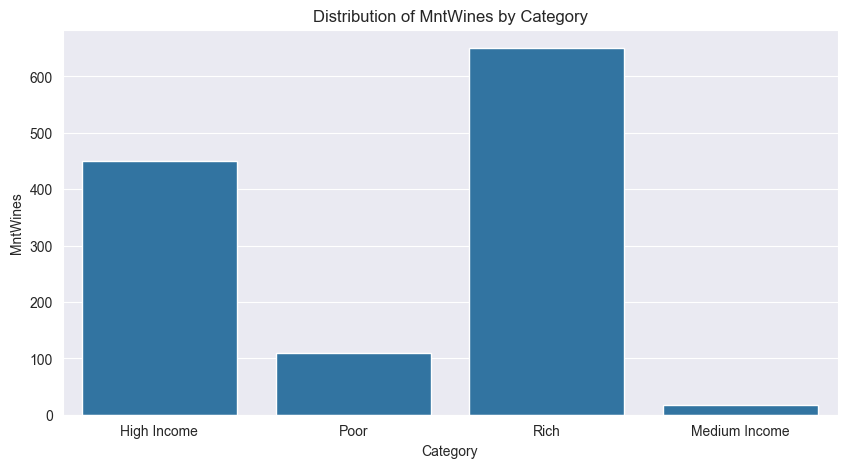

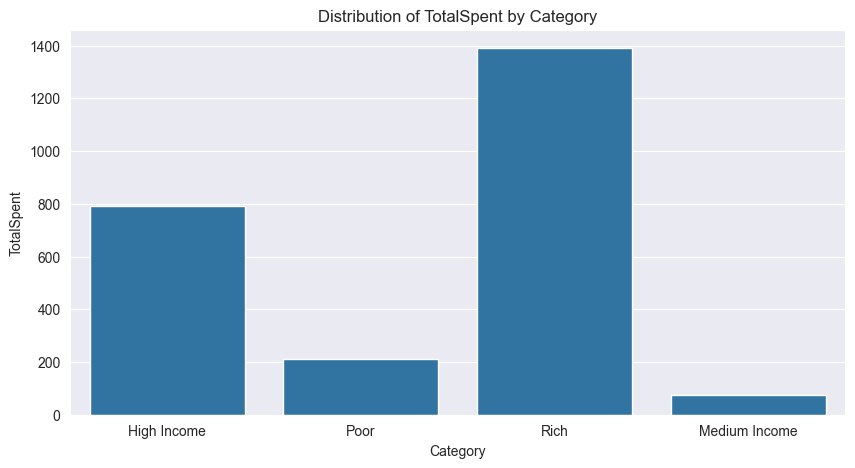

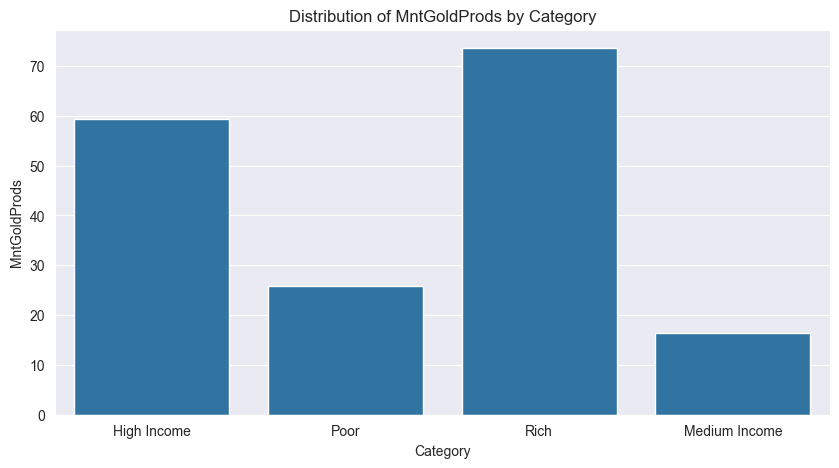

In [719]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df and has a column 'Category' (e.g., "rich" and "poor")
plt.figure(figsize=(12, 6))

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df["Segment"], y=df[feature],errorbar=None)
    plt.title(f"Distribution of {feature} by Category")
    plt.xlabel("Category")
    plt.ylabel(feature)
    plt.show()

In [720]:
df.groupby("SpendingCluster")["TotalSpent"].mean()

SpendingCluster
0    1122.274123
1     576.370283
2    1768.423221
3     101.045541
Name: TotalSpent, dtype: float64

In [721]:

pd.crosstab(df["SpendingHabits"], df["Segment"])


Segment,High Income,Medium Income,Poor,Rich
SpendingHabits,,,,
High Spender,106,438,507,3
Low Spender,51,1,1,214
Medium Spender,233,10,126,55
Very High Spender,226,0,14,216


In [722]:
df[(df["SpendingHabits"] == "High Spender")].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.0,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.0
mean,1970.920304,35148.375712,0.766603,0.487666,48.977230,45.408918,4.999051,23.517078,7.139469,5.391841,...,0.000949,0.001898,0.010436,3.0,11.0,0.091082,101.045541,54.079696,2.211575,3.0
std,11.093889,12742.846749,0.503157,0.531389,29.104088,55.083023,7.652905,23.730466,11.309616,10.942705,...,0.030802,0.043540,0.101673,0.0,0.0,0.287862,86.200498,11.093889,0.881281,0.0
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,29.000000,0.000000,3.0
25%,1963.000000,26168.500000,0.000000,0.000000,24.000000,8.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,39.000000,46.000000,2.000000,3.0
50%,1972.000000,34925.500000,1.000000,0.000000,49.000000,23.000000,2.000000,15.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,53.000000,2.000000,3.0
75%,1979.000000,43640.250000,1.000000,1.000000,75.000000,62.000000,6.000000,29.000000,10.000000,7.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,139.000000,62.000000,3.000000,3.0
max,1996.000000,113734.000000,2.000000,2.000000,99.000000,280.000000,65.000000,137.000000,150.000000,262.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,339.000000,85.000000,3.000000,3.0


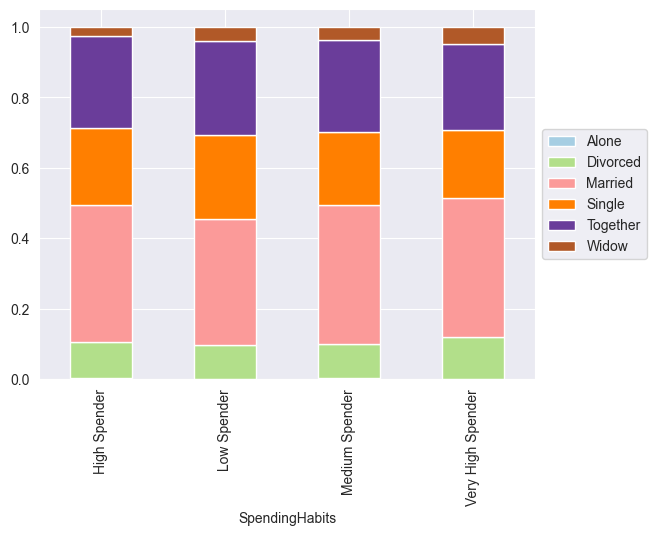

In [723]:

df_plot = df.groupby(['Marital_Status', 'SpendingHabits']).size().reset_index(name='Count')
df_plot = df_plot.pivot(columns='Marital_Status', index='SpendingHabits', values='Count')

df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True,  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))